# Part 1

In [11]:
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import seaborn as sns
from collections import Counter
import squarify



In [12]:
import datetime

start_date = datetime.date(2020, 1, 27)
end_date = datetime.date(2020, 3, 25)

delta = datetime.timedelta(days=6)
date_list = []

while start_date + delta <= end_date:
    start_date += delta
    date_list.append(start_date.strftime('%Y-%m-%d'))


print(date_list)

['2020-02-02', '2020-02-08', '2020-02-14', '2020-02-20', '2020-02-26', '2020-03-03', '2020-03-09', '2020-03-15', '2020-03-21']


In [13]:
api_key = 'Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'
empty_json = {}

for i in range(len(date_list)-1):
    start = date_list[i]
    end = date_list[i+1]
    endPoint = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start}&end_date={end}&api_key={api_key}'
    request = requests.get(endPoint)
    data = request.json()
    empty_json[start + '_' + end] = data
empty_json


{'2020-02-02_2020-02-08': {'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2020-02-08&end_date=2020-02-14&detailed=false&api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc',
   'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2020-01-27&end_date=2020-02-02&detailed=false&api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc',
   'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2020-02-02&end_date=2020-02-08&detailed=false&api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
  'element_count': 135,
  'near_earth_objects': {'2020-02-02': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2103067?api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
     'id': '2103067',
     'neo_reference_id': '2103067',
     'name': '103067 (1999 XA143)',
     'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2103067',
     'absolute_magnitude_h': 16.84,
     'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.1390819672,
       'estimated_diameter_

In [14]:
import pyperclip as clip


empty_json
clip.copy(f"{empty_json}")

In [15]:
import copy

total = {
    "element_count": 0,
    "near_earth_objects": {}
}

for period in empty_json:
    for date in empty_json[period]["near_earth_objects"]:
        if date not in total["near_earth_objects"]:
            total["near_earth_objects"][date] = copy.deepcopy(empty_json[period]["near_earth_objects"][date])
        else:
            total["near_earth_objects"][date].extend(empty_json[period]["near_earth_objects"][date])
        total["element_count"] += empty_json[period]["element_count"]

output = {"total": total}


In [16]:
clip.copy(f"{output}")
output



{'total': {'element_count': 6755,
  'near_earth_objects': {'2020-02-02': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2103067?api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
     'id': '2103067',
     'neo_reference_id': '2103067',
     'name': '103067 (1999 XA143)',
     'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2103067',
     'absolute_magnitude_h': 16.84,
     'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.1390819672,
       'estimated_diameter_max': 2.5470647106},
      'meters': {'estimated_diameter_min': 1139.0819672164,
       'estimated_diameter_max': 2547.06471064},
      'miles': {'estimated_diameter_min': 0.7077925011,
       'estimated_diameter_max': 1.5826721463},
      'feet': {'estimated_diameter_min': 3737.1456813222,
       'estimated_diameter_max': 8356.5117852563}},
     'is_potentially_hazardous_asteroid': True,
     'close_approach_data': [{'close_approach_date': '2020-02-02',
       'close_approach_date_full': '2020-

In [17]:
asteroid_list = output['total']
dates = list(output['total']['near_earth_objects'].keys())
dates
asteroid_list

{'element_count': 6755,
 'near_earth_objects': {'2020-02-02': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2103067?api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
    'id': '2103067',
    'neo_reference_id': '2103067',
    'name': '103067 (1999 XA143)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2103067',
    'absolute_magnitude_h': 16.84,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.1390819672,
      'estimated_diameter_max': 2.5470647106},
     'meters': {'estimated_diameter_min': 1139.0819672164,
      'estimated_diameter_max': 2547.06471064},
     'miles': {'estimated_diameter_min': 0.7077925011,
      'estimated_diameter_max': 1.5826721463},
     'feet': {'estimated_diameter_min': 3737.1456813222,
      'estimated_diameter_max': 8356.5117852563}},
    'is_potentially_hazardous_asteroid': True,
    'close_approach_data': [{'close_approach_date': '2020-02-02',
      'close_approach_date_full': '2020-Feb-02 23:35',
      'epoch

In [18]:
# Parse data
non_hazard = 0
non_hazardous_asteroids =[]
hazardous_asteroids = []
for date in asteroid_list["near_earth_objects"]:
    for date in dates:
        for asteroid in asteroid_list["near_earth_objects"][date]:
            if asteroid["is_potentially_hazardous_asteroid"]:
                brightness = asteroid["absolute_magnitude_h"]
                size_min = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_min"]
                size_max = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_max"]
                velocity = asteroid["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"]
                distance = asteroid["close_approach_data"][0]["miss_distance"]["kilometers"]
                hazardous_asteroids.append(["name", asteroid["name"], "size_min", size_min, "size_max", size_max, "velocity", velocity, "distance",distance, "brightness", brightness])
            else:
                non_hazard+=1
                brightness = asteroid["absolute_magnitude_h"]
                size_min = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_min"]
                size_max = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_max"]
                velocity = asteroid["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"]
                distance = asteroid["close_approach_data"][0]["miss_distance"]["kilometers"]
                non_hazardous_asteroids.append(["name", asteroid["name"], "size_min", size_min, "size_max", size_max, "velocity", velocity, "distance",distance, "brightness", brightness])

# Print results
# print(hazardous_asteroids)
# for asteroid in hazardous_asteroids:
#     print('asteroid')
#     print(asteroid)
# asteroids = np.array(hazardous_asteroids)
print((hazardous_asteroids[0]))
print(non_hazard)

['name', '103067 (1999 XA143)', 'size_min', 1.1390819672, 'size_max', 2.5470647106, 'velocity', '22.5189167488', 'distance', '45560227.895060967', 'brightness', 16.84]
43267


# Part 3


## Categorical data , we only analyze hazardous asteroids because they are more of interest|. 

NEO stands for near earth object, which is an identified flying object or asteroid which is in close proximity to earth. The ones that are potentiallly hazerdous are of interest to us. We want to see what kind of features these potentially hazerdous objects have. Their speed, their size , their absolute magnitude and if these attributes have any correlation to one another. 

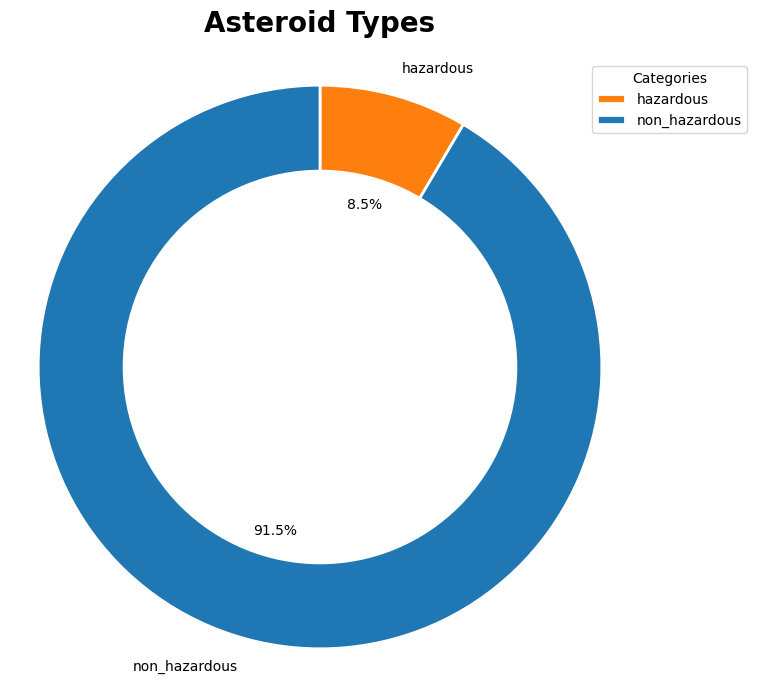

In [19]:
# Generate some example data
labels = ['hazardous', 'non_hazardous']
sizes = [len(hazardous_asteroids), non_hazard]


# Define the colors to use for each category
colors = ['#ff7f0e', '#1f77b4']

# Add some shading to the colors
shade = 0.4
shaded_colors = [(np.array(plt.get_cmap('Set2')(i)[:3]) * (1 - shade)).tolist()
                 for i in range(len(labels))]
                 
# Update the colors with the new colors
for i in range(len(colors)):
    shaded_colors[i] = colors[i]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False,
       colors=shaded_colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a circle in the center to make it look like a donut chart
center_circle = plt.Circle((0, 0), 0.7, fc='white')
ax.add_artist(center_circle)

# Add some labels and formatting
ax.axis('equal')
ax.set_title('Asteroid Types', fontsize=20, fontweight='bold', pad=20)
ax.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.setp(ax.spines.values(), linewidth=3)

plt.show()




# Grid Overview of hazerdous near earth asteroids

In [20]:
df = pd.DataFrame(non_hazardous_asteroids)
columns=['Near Earth Object Name', 'size_min', 'size_max', 'velocity', 'distance', 'brightness']
df = df.iloc[:, 1::2]
df.columns = columns
# size_average
df['size_average'] = df.apply(lambda row: np.mean(row[['size_min', 'size_max']]), axis=1)

#  standard deviation of size_average
df['std_size_average'] = df.apply(lambda row: np.std(row[['size_min', 'size_max']]), axis=1)

df['velocity'] = df['velocity'].astype(float)
df['distance'] = df['distance'].astype(float)

size_min_mean = df['size_min'].mean()
size_max_mean = df['size_max'].mean()
velocity_mean = df['velocity'].mean()
distance_mean = df['distance'].mean()
brightness_mean = df['brightness'].mean()
df

Near Earth Object Name  size_min  size_max   velocity      distance  \
0         416231 (2003 AJ73)  0.490405  1.096579   3.289999  7.218953e+07   
1          503960 (2004 QF1)  0.584191  1.306291  13.704396  3.777881e+07   
2          512245 (2016 AU8)  0.291444  0.651688   7.044234  2.889605e+07   
3                (2015 AP45)  0.175612  0.392681  10.082118  7.121591e+07   
4                (2017 WD15)  0.035039  0.078350  10.790759  3.090741e+07   
...                      ...       ...       ...        ...           ...   
43262             (2020 FD5)  0.031956  0.071456  24.730149  3.523050e+06   
43263              (2020 GY)  0.023150  0.051765  12.821821  6.486000e+06   
43264             (2020 NJ1)  0.076658  0.171412   8.812144  4.313607e+07   
43265             (2021 SM3)  0.073885  0.165211  18.065884  3.073398e+07   
43266             (2022 FA4)  0.019167  0.042859  15.027068  5.105831e+07   

       brightness  size_average  std_size_average  
0           18.67      0.793492          0.303087  
1           18.29      0.945241          0.361050  
2           19.80      0.471566          0.180122  
3           20.90      0.284147          0.108534  
4           24.40      0.056695          0.021655  
...           ...           ...               ...  
43262       24.60      0.051706          0.019750  
43263       25.30      0.037458          0.014308  
43264       22.70      0.124035          0.047377  
43265       22.78      0.119548          0.045663  
43266       25.71      0.031013          0.011846  

[43267 rows x 8 columns]

In [21]:
df2 = pd.DataFrame(hazardous_asteroids)
columns=['Near Earth Object Name', 'size_min', 'size_max', 'velocity', 'distance', 'brightness']
df2 = df2.iloc[:, 1::2]
df2.columns = columns
# size_average
df2['size_average'] = df2.apply(lambda row: np.mean(row[['size_min', 'size_max']]), axis=1)

#  standard deviation of size_average
df2['std_size_average'] = df2.apply(lambda row: np.std(row[['size_min', 'size_max']]), axis=1)

df2['velocity'] = df2['velocity'].astype(float)
df2['distance'] = df2['distance'].astype(float)

hazardous_asteroids_size_min_mean = df2['size_min'].mean()
hazardous_asteroids_size_max_mean = df2['size_max'].mean()
hazardous_asteroids_velocity_mean = df2['velocity'].mean()
hazardous_asteroids_distance_mean = df2['distance'].mean()
hazardous_asteroids_brightness_mean = df2['brightness'].mean()
df2

realdf2 = df2
realdf2

Near Earth Object Name  size_min  size_max   velocity      distance  \
0       103067 (1999 XA143)  1.139082  2.547065  22.518917  4.556023e+07   
1                (2008 OX1)  0.133216  0.297879  16.982234  2.434385e+07   
2        350523 (2000 EA14)  0.155796  0.348369  14.912317  4.854588e+07   
3               (2020 BX12)  0.198863  0.444672  25.280852  4.360793e+06   
4               (2003 SS84)  0.116026  0.259442  14.453926  1.493341e+07   
...                     ...       ...       ...        ...           ...   
4013              (2017 EN)  0.201630  0.450858  26.614283  4.367336e+07   
4014            (2020 BN10)  0.168483  0.376738  14.279064  3.895258e+07   
4015     612143 (2000 BO28)  0.286124  0.639794  17.774047  1.098079e+07   
4016            (2004 RY10)  0.160160  0.358129  22.133672  1.548795e+07   
4017            (2004 FY31)  0.110804  0.247765  17.383699  3.675402e+07   

      brightness  size_average  std_size_average  
0          16.84      1.843073          0.703991  
1          21.50      0.215547          0.082332  
2          21.16      0.252082          0.096287  
3          20.63      0.321768          0.122904  
4          21.80      0.187734          0.071708  
...          ...           ...               ...  
4013       20.60      0.326244          0.124614  
4014       20.99      0.272611          0.104128  
4015       19.84      0.462959          0.176835  
4016       21.10      0.259145          0.098985  
4017       21.90      0.179284          0.068481  

[4018 rows x 8 columns]

## Overview Of hazerdous NEO's with histograms

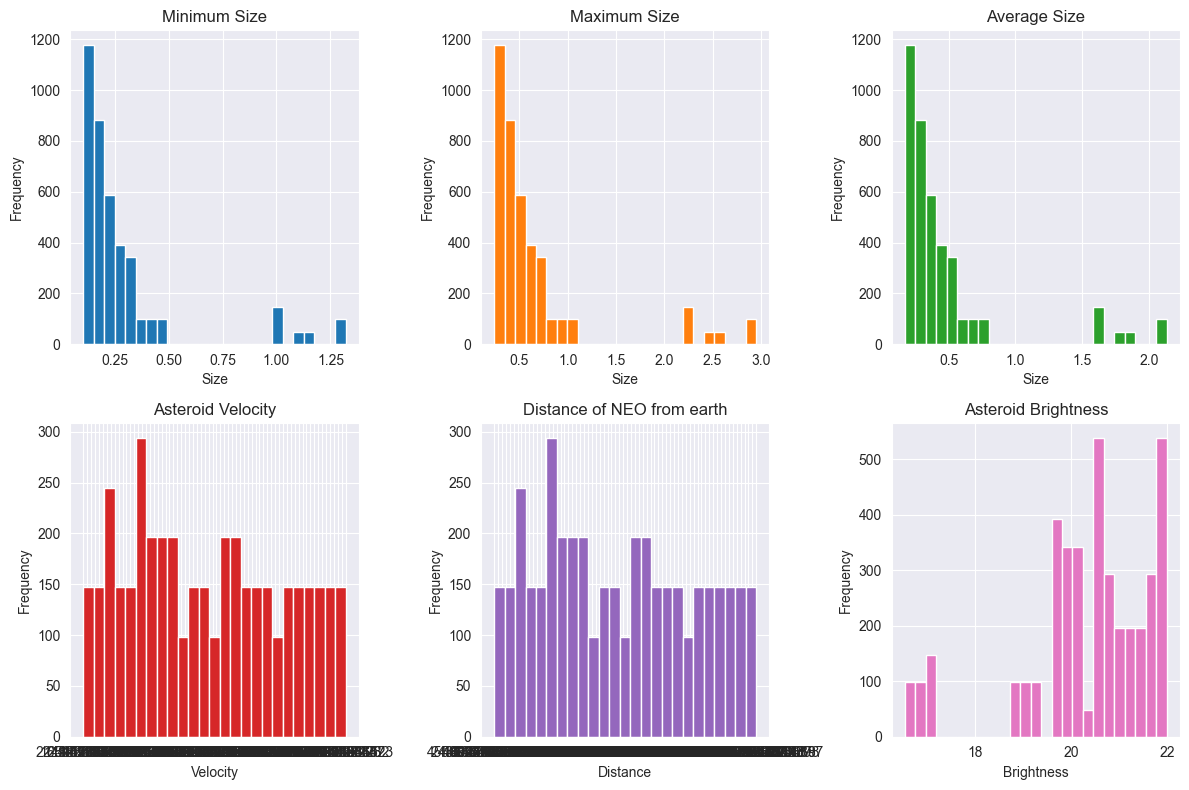

In [22]:
# Set the style of the plot
sns.set_style("darkgrid")

# Set the size of the plot
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Data extraction
size_min_values = [d[3] for d in hazardous_asteroids]
size_max_values = [d[5] for d in hazardous_asteroids]
velocity_values = [d[7] for d in hazardous_asteroids]
distance_values = [d[9] for d in hazardous_asteroids]
brightness_values = [d[11] for d in hazardous_asteroids]
size_average = [(float(x[3]) + float(x[5])) / 2 for x in hazardous_asteroids]

# Set the number of bins
num_bins_1 = 25

# Create histograms
axs[0, 0].hist(size_min_values, bins=num_bins_1, color='tab:blue')
axs[0, 0].set_title('Minimum Size')
axs[0, 0].set_xlabel('Size')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(size_max_values, bins=num_bins_1, color='tab:orange')
axs[0, 1].set_title('Maximum Size')
axs[0, 1].set_xlabel('Size')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(size_average, bins=num_bins_1, color='tab:green')
axs[0, 2].set_title('Average Size')
axs[0, 2].set_xlabel('Size')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(velocity_values, bins=num_bins_1, color='tab:red')
axs[1, 0].set_title('Asteroid Velocity')
axs[1, 0].set_xlabel('Velocity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(distance_values, bins=num_bins_1, color='tab:purple')
axs[1, 1].set_title('Distance of NEO from earth')
axs[1, 1].set_xlabel('Distance')
axs[1, 1].set_ylabel('Frequency')

axs[1,2].hist(brightness_values, bins=num_bins_1, color='tab:pink')
axs[1,2].set_title('Asteroid Brightness')
axs[1,2].set_xlabel('Brightness')
axs[1,2].set_ylabel('Frequency')

# Set the layout and show the plot
plt.tight_layout()
plt.show()


In [23]:
# s

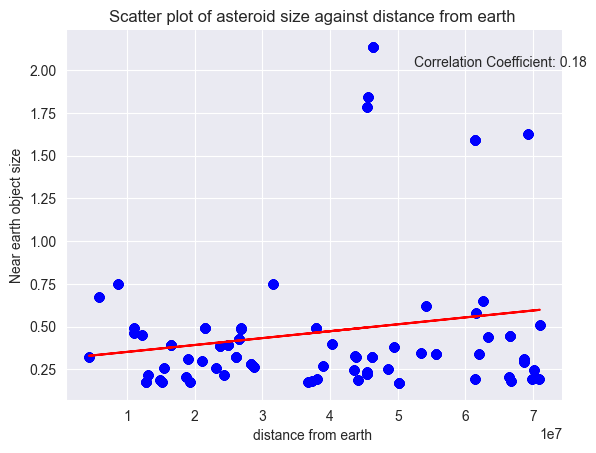

In [24]:
# Create two lists of data
x = distance_values
y = size_average


# Convert arrays to float data type
x = np.array(x).astype(float)
y = np.array(y).astype(float)

# Apply mathematical operation
result = np.maximum(x, y)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope*np.array(x) + intercept

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue')

# Add the line of best fit
ax.plot(x, line, color='red')

# Add labels and title
plt.xlabel('distance from earth ')
plt.ylabel('Near earth object size')
plt.title('Scatter plot of asteroid size against distance from earth ')

# Add correlation coefficient
corr_coef = r_value.round(2)
ax.text(0.7, 0.9, f'Correlation Coefficient: {corr_coef}', transform=ax.transAxes)

# Customize the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the plot
plt.show()

/var/folders/zq/hq4xy9bd3_3cldr6smlxgkxr0000gp/T/ipykernel_30750/1148925802.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(size_average, velocity_values, s=50, c='red', cmap='coolwarm')


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U13'), dtype('float64')) -> None

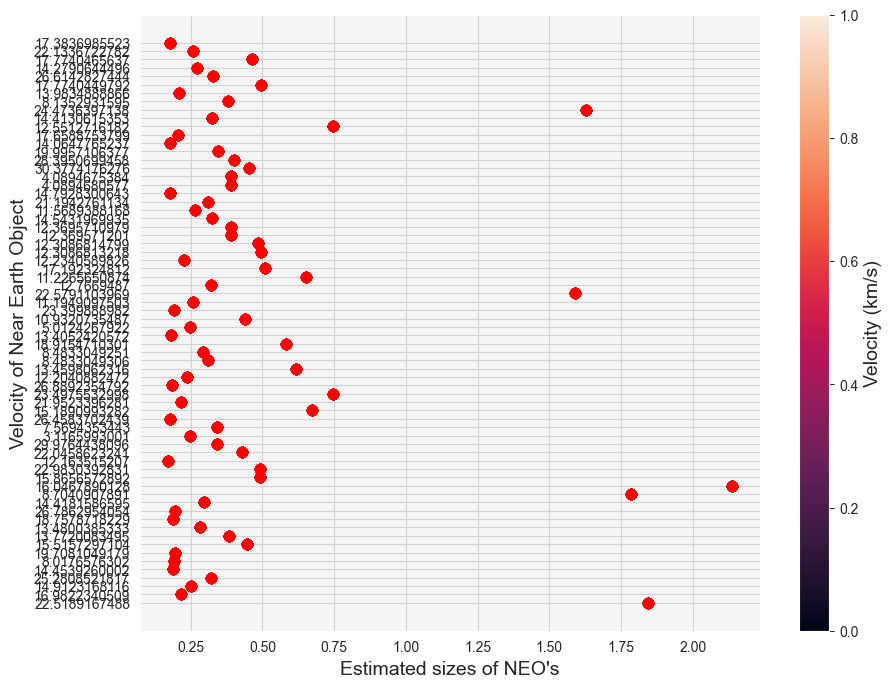

In [32]:
# set some custom styling for the plot
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['grid.color'] = '#d3d3d3'

# plot the data
plt.scatter(size_average, velocity_values, s=50, c='red', cmap='coolwarm')
plt.xlabel('Estimated sizes of NEO\'s', fontsize=14)
plt.ylabel('Velocity of Near Earth Object', fontsize=14)

# add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label('Velocity (km/s)', fontsize=14)

# fit a line to the data using polyfit
coefficients = np.polyfit(size_average, velocity_values, 1)
fit_fn = np.poly1d(coefficients)
plt.plot(size_average, fit_fn(size_average), color='black', linestyle='--', linewidth=2)

# compute the correlation coefficient using corrcoef
corr = np.corrcoef(size_average, velocity_values)[0, 1]
plt.title(f'Correlation coefficient: {corr:.2f}', fontsize=16)

# add some text to the plot
plt.text(0.05, 0.95, f'Number of asteroids: {len(velocity_values)}', transform=plt.gca().transAxes, fontsize=12, va='top')


# show the plot
plt.show()


**Absolute Magnitude** :
- Is defined to be the apparent magnitude an object would have if it were located at a distance of 10 parsecs. So for example, the apparent magnitude of the Sun is -26.7 and is the brightest celestial object we can see from Earth.
- https://lco.global/spacebook/distance/what-absolute-magnitude/#:~:text=Absolute%20magnitude%20is%20defined%20to,we%20can%20see%20from%20Earth.

In [ ]:
# Round the brightness values to the nearest whole number
brightness_values = [d[11] for d in hazardous_asteroids]
brightness_values = [round(b) for b in brightness_values]

# Calculate the frequencies of each brightness value
brightness_freq = {b: brightness_values.count(b) for b in set(brightness_values)}

# Sort the brightness values in ascending order
brightness_sorted = sorted(brightness_freq.keys())

# Create a list of sizes for the circles
sizes = [10*brightness_freq[b] for b in brightness_sorted]

# Create the dot plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, b in enumerate(brightness_sorted):
    ax.plot([i+1]*brightness_freq[b], [b]*brightness_freq[b],
            'o', markersize=13*brightness_freq[b]/max(brightness_freq.values()), color='red')

# Add labels and title
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Brightness', fontsize=14)
plt.title('Dot Plot of Absolute Magnitude', fontsize=18)

# Customize the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylim([0, max(brightness_sorted)+1])
ax.set_xlim([0.5, len(brightness_sorted)+0.5])
plt.grid(axis='y', alpha=0.4)

# Add line of best fit
x = np.array([i+1 for i in range(len(brightness_sorted))])
y = np.array(brightness_sorted)
p = np.polyfit(x, y, 2)
xfit = np.linspace(1, len(brightness_sorted), 100)
yfit = np.polyval(p, xfit)
ax.plot(xfit, yfit, color='red', linestyle='--', linewidth=2)

# Add info about line of best fit
textstr = f'Line of best fit:\n{p[0]:.2f}x^2 + {p[1]:.2f}x + {p[2]:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='grey')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Display the plot
plt.show()


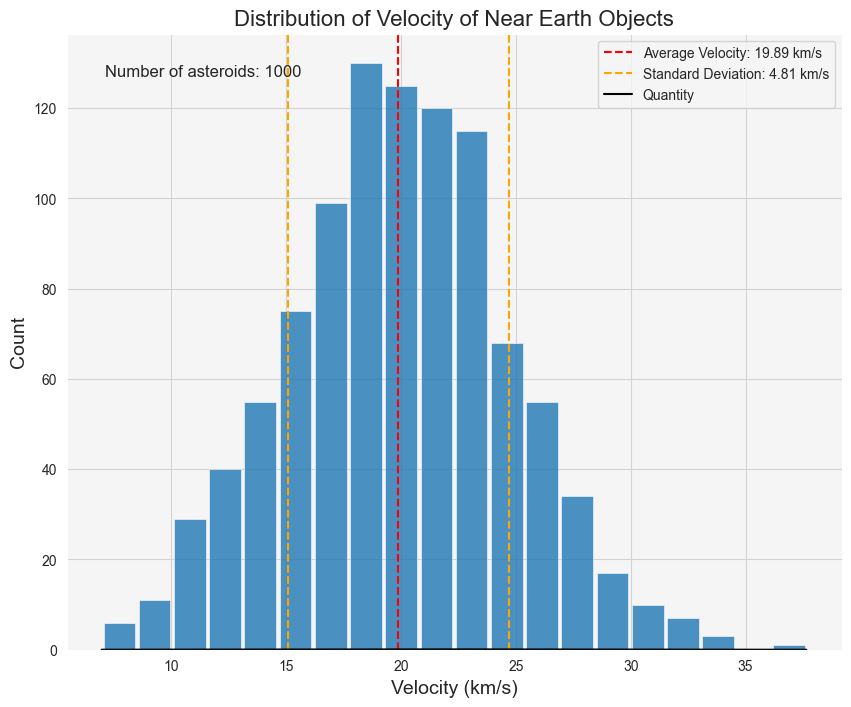

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# generate some sample data
velocities = np.random.normal(loc=20, scale=5, size=1000)

# compute the average velocity and standard deviation
avg_velocity = np.mean(velocities)
std_velocity = np.std(velocities)

# add vertical lines to indicate the average velocity and standard deviation
plt.axvline(x=avg_velocity, color='red', linestyle='--', label=f'Average Velocity: {avg_velocity:.2f} km/s')
plt.axvline(x=avg_velocity + std_velocity, color='orange', linestyle='--', label=f'Standard Deviation: {std_velocity:.2f} km/s')
plt.axvline(x=avg_velocity - std_velocity, color='orange', linestyle='--')

# plot a Quantity curve over the histogram
quantity = gaussian_kde(velocities)
xs = np.linspace(min(velocities), max(velocities), 200)
plt.plot(xs, quantity(xs), color='black', label='Quantity')

# adjust the bar width and color
num_bins = 20
plt.hist(velocities, bins=num_bins, color='#1f77b4', edgecolor='#ffffff', alpha=0.8, density=False, linewidth=0.5, rwidth=0.9)

# add some text to the plot
plt.text(0.05, 0.95, f'Number of asteroids: {len(velocities)}', transform=plt.gca().transAxes, fontsize=12, va='top')

# set the x-axis label and title
plt.xlabel('Velocity (km/s)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Velocity of Near Earth Objects', fontsize=16)

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


# A Pareto Chart 


In [ ]:
# Create a list of tuples with distance and brightness
neos_dist_brightness = [(x[-3], x[-1]) for x in hazardous_asteroids]

# Sort the NEOs in descending order by brightness
neos_sorted = sorted(neos_dist_brightness, key=lambda x: x[1], reverse=True)

# Get the top 10 brightest NEOs
neos_top10 = neos_sorted[:10]

# Calculate the cumulative brightness
cumulative_brightness = [neos_top10[0][1]]
for i in range(1, len(neos_top10)):
    cumulative_brightness.append(cumulative_brightness[-1] + neos_top10[i][1])

# Create a bar chart for NEO brightness
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(range(len(neos_top10)), [x[1] for x in neos_top10], color='blue')
ax1.set_xlabel('Top 10 Brightest NEOs (by brightness)')
ax1.set_ylabel('Brightness')
ax1.set_xticks(range(len(neos_top10)))
ax1.set_xticklabels([f'{x[0]} ({x[1]})' for x in neos_top10], rotation=45, ha='right')
ax1.set_ylim([0, int(max([x[1] for x in neos_top10])*1.2)])
ax1.tick_params(axis='y')

# Create a line plot for cumulative brightness
ax2 = ax1.twinx()
ax2.plot(range(len(neos_top10)), cumulative_brightness, color='red', marker='o')
ax2.set_ylabel('Cumulative Brightness')
ax2.set_ylim([0, int(max(cumulative_brightness)*1.2)])
ax2.tick_params(axis='y', colors='red')

# Set chart title and legend
ax1.set_title('Pareto Chart for NEO Brightness')
ax1.legend(['NEO Brightness'], loc='upper left')
ax2.legend(['Cumulative Brightness'], loc='upper right')

# Show the chart
plt.show()


# A Radar Spider Chart 

In [ ]:
# Data
size_min_mean_ratio = size_min_mean / hazardous_asteroids_size_min_mean 
size_max_mean_ratio = size_max_mean / hazardous_asteroids_size_max_mean 
velocity_mean_ratio = velocity_mean / hazardous_asteroids_velocity_mean 
distance_mean_ratio = distance_mean / hazardous_asteroids_distance_mean 
brightness_mean_ratio = brightness_mean / hazardous_asteroids_brightness_mean

non_hazardous_asteroids_list = [size_min_mean_ratio, size_max_mean_ratio, velocity_mean_ratio, distance_mean_ratio, brightness_mean_ratio]

hazardous_asteroids_size_min_mean_ratio =  hazardous_asteroids_size_min_mean / size_min_mean 
hazardous_asteroids_size_max_mean_ratio =  hazardous_asteroids_size_max_mean / size_max_mean_ratio 
hazardous_asteroids_velocity_mean_ratio =  hazardous_asteroids_velocity_mean / velocity_mean 
hazardous_asteroids_distance_mean_ratio =  hazardous_asteroids_distance_mean / distance_mean 
hazardous_asteroids_brightness_mean_ratio = hazardous_asteroids_brightness_mean / brightness_mean 

hazardous_asteroids_list = [hazardous_asteroids_size_min_mean_ratio, hazardous_asteroids_size_max_mean_ratio,
                       hazardous_asteroids_velocity_mean_ratio, hazardous_asteroids_distance_mean_ratio, 
                       hazardous_asteroids_brightness_mean_ratio]

categories = ['Average Size Min', 'Average Size Max', 'Average Velocity', 'Average Closest Distance From Earth', 'Average Absolute Brightness']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories), endpoint=False)
width = 2 * np.pi / len(categories)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Set r axis
ax.set_rlim(0, max(max(non_hazardous_asteroids_list), max(hazardous_asteroids_list)) + 0.2)

# Plot lines
for i, (restaurant, label, linestyle, marker, color) in enumerate(zip([non_hazardous_asteroids_list, hazardous_asteroids_list], 
                                                                ['Non-Hazardous Asteroids', 'Hazardous Asteroids'], 
                                                                ['--', '-.'], 
                                                                ['o', 's'], 
                                                                ['C0', 'C1'])):
    ax.plot(label_loc, restaurant, label=label, linewidth=2, linestyle=linestyle, marker=marker, markersize=8, color=color)
    ax.fill_between(label_loc, restaurant, alpha=0.1, color=color)

# Add labels, grid, and legend
lines, labels = ax.set_thetagrids(np.degrees(label_loc), labels=categories, fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)
ax.legend(fontsize=12)

# Add title
plt.title('Comparison of Non-Hazardous and Hazardous Asteroids', fontsize=18)

plt.show()


In [ ]:
print(non_hazardous_asteroids[0])


# box plot


In [ ]:
import matplotlib.pyplot as plt


# Extract data for box plot
sizes_min = size_min_values
sizes_max = size_max_values
distances = [float(d) for d in distance_values]
velocities = [float(d) for d in velocity_values]
brightnesses = brightness_values

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create box plot for sizes
axs[0].boxplot([sizes_min, sizes_max])
axs[0].set_xticklabels(['Size Min', 'Size Max'])
axs[0].set_ylabel('Size (km)')
axs[0].set_title('Asteroid Sizes')

# Create box plot for distances
axs[1].boxplot([distances])
axs[1].set_xticklabels(['Distance'])
axs[1].set_ylabel('Distance (km)')
axs[1].set_title('Asteroid Distances')

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Velocity box plot
ax1.boxplot(velocities)
ax1.set_title('Velocity', fontsize=16)
ax1.set_ylabel('km/s', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

# Brightness box plot
ax2.boxplot(brightnesses)
ax2.set_title('Brightness', fontsize=16)
ax2.set_ylabel('Absolute Magnitude', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)

# Show plot
plt.show()


In [ ]:
hazardous_asteroids[0]


# tree map

In [ ]:
realdf2
df_ab = df.iloc[:, [0,1, 2,3,4,5]]
df_ab
df_first_500 = df.iloc[:500]
df_first_500

In [ ]:
# calculate the total sum of values
total = df_numeric.sum().sum()

# create tree map
squarify.plot(sizes=df_numeric.values.flatten(), label=df['category'], alpha=.8 )

# add title and axis labels
plt.title("Tree Map")
plt.axis('off')
plt.show()

# pairwise plot

# correlelogram

In [ ]:
data = np.array(hazardous_asteroids)

# Convert data to DataFrame
df = pd.DataFrame(data[:, [1, 3, 5, 7, 9, 11]], columns=['Name', 'Size Min', 'Size Max', 'Velocity', 'Distance', 'Brightness'])
df[['Size Min', 'Size Max', 'Velocity', 'Distance', 'Brightness']] = df[['Size Min', 'Size Max', 'Velocity', 'Distance', 'Brightness']].apply(pd.to_numeric)

# Create correlogram using pairplot
sns.pairplot(df)


No correlation between velocity of object and its distance from earth 

### To write in report

- Firstly the data did not allow me to return a large data set. It was restricted to near earth objects from within the last 7 days. To overcome this we use a for loop with specified dates using the date object. We can now get a larger data set by specifying the start and end dates we want to use. The api spits out jsons and we join them together in a smart manner for later analysis. 

- The jsons are added in an itterative fashion so one might expect the first date to be added first, the second date specified to be added second and so on in an itterative manner. In reality the dates are added at ranodom, the same way as would be in a hashmap. If we want to analyse data by the days of the week we would have a problem. Luckily a key is added to each json item. This prevents json data being overwritten and keeps track of which date the information specified is for. 

- 